# Use case: reading the full grid from MITgcm input files

In some configurations (llc, cube-sphere,...) the model's grid is provided in a set of input binary files rather than being defined in the namelist. In such configurations, land processors elimination results in blank areas in the XC, YC,... fields outputed by the model. In some cases (regridding, plotting,...), it can be useful to retrieve directly the original fields. To do so, we can use the **xmitgcm.utils.get_grid_from_input** function.

## Example 1: LLC90

In [1]:
#We're going to download a sample grid from figshare
!wget https://ndownloader.figshare.com/files/14072594
!tar -xf 14072594

--2019-04-30 12:01:02--  https://ndownloader.figshare.com/files/14072594
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 52.212.121.3, 52.48.232.64
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|52.212.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/14072594/grid_llc90.tar.gz [following]
--2019-04-30 12:01:02--  https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/14072594/grid_llc90.tar.gz
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.97.218
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.97.218|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6219758 (5.9M) [application/gzip]
Saving to: ‘14072594.1’

100%[======================================>] 6,219,758   7.88MB/s   in 0.8s   

2019-04-30 12:01:03 (7.88 MB/s) - ‘14072594.1’ saved [6219758/6219758]



In [2]:
import xmitgcm

In [3]:
# We generate the extra metadata needed for multi-faceted grids
llc90_extra_metadata = xmitgcm.utils.get_extra_metadata(domain='llc', nx=90)

# Then we read the grid from the input files
grid = xmitgcm.utils.get_grid_from_input('./grid_llc90/tile<NFACET>.mitgrid', 
                                         geometry='llc', 
                                         extra_metadata=llc90_extra_metadata)

*grid* is a xarray dataset that contains lat/lon (XC, YC, XG, YG) and the grid's scale factors:

In [4]:
grid

<xarray.Dataset>
Dimensions:  (face: 13, i: 90, i_g: 90, j: 90, j_g: 90)
Coordinates:
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    XC       (face, j, i) >f8 dask.array<shape=(13, 90, 90), chunksize=(1, 90, 90)>
    YC       (face, j, i) >f8 dask.array<shape=(13, 90, 90), chunksize=(1, 90, 90)>
    DXF      (face, j, i) >f8 dask.array<shape=(13, 90, 90), chunksize=(1, 90, 90)>
    DYF      (face, j, i) >f8 dask.array<shape=(13, 90, 90), chunksize=(1, 90, 90)>
    RAC      (face, j, i) >f8 dask.array<shape=(13, 90, 90), chunksize=(1, 90, 90)>
    XG       (face, j_g, i_g) >f8 dask.array<shape=(13, 90, 90), chunksize=(1, 90, 90)>
    YG       (fac

The obtained dataset is then ready for use for the desired application:

In [5]:
%matplotlib inline

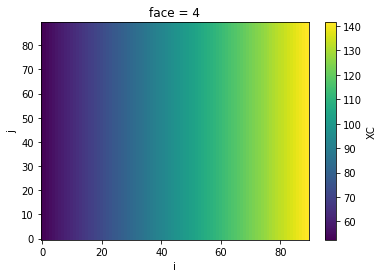

In [6]:
grid['XC'].sel(face=4).plot()

## Example 2: ASTE

In [7]:
!wget https://ndownloader.figshare.com/files/14072591
!tar -xf 14072591

--2019-04-30 12:01:05--  https://ndownloader.figshare.com/files/14072591
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 52.212.121.3, 52.48.232.64
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|52.212.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/14072591/grid_aste270.tar.gz [following]
--2019-04-30 12:01:05--  https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/14072591/grid_aste270.tar.gz
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.97.218
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.97.218|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23159101 (22M) [application/gzip]
Saving to: ‘14072591.1’

100%[======================================>] 23,159,101  2.33MB/s   in 10s    

2019-04-30 12:01:15 (2.16 MB/s) - ‘14072591.1’ saved [23159101/23159101]



In [8]:
# We generate the extra metadata needed for multi-faceted grids
aste_extra_metadata = xmitgcm.utils.get_extra_metadata(domain='aste', nx=270)

# Then we read the grid from the input files
grid_aste = xmitgcm.utils.get_grid_from_input('./grid_aste270/tile<NFACET>.mitgrid', 
                                              geometry='llc', 
                                              extra_metadata=aste_extra_metadata)

In [9]:
grid_aste

<xarray.Dataset>
Dimensions:  (face: 6, i: 270, i_g: 270, j: 270, j_g: 270)
Coordinates:
  * i        (i) int64 0 1 2 3 4 5 6 7 8 ... 261 262 263 264 265 266 267 268 269
  * j        (j) int64 0 1 2 3 4 5 6 7 8 ... 261 262 263 264 265 266 267 268 269
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * face     (face) int64 0 1 2 3 4 5
Data variables:
    XC       (face, j, i) float64 dask.array<shape=(6, 270, 270), chunksize=(1, 270, 270)>
    YC       (face, j, i) float64 dask.array<shape=(6, 270, 270), chunksize=(1, 270, 270)>
    DXF      (face, j, i) float64 dask.array<shape=(6, 270, 270), chunksize=(1, 270, 270)>
    DYF      (face, j, i) float64 dask.array<shape=(6, 270, 270), chunksize=(1, 270, 270)>
    RAC      (face, j, i) float64 dask.array<shape=(6, 270, 270), chunksize=(1, 270, 270)>
    XG       (face, j_g, i_g) float64 dask.array<shape=(6, 270, 270), chunksize=(1

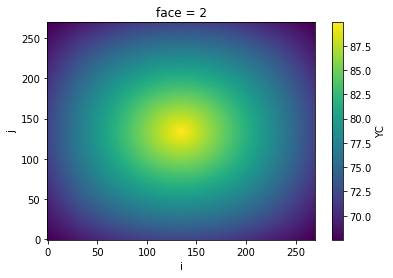

In [11]:
grid_aste['YC'].sel(face=2).plot()